In [2]:
# Importing the required libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Extracting the dataset: 
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Performing the EDA: 
df.shape

(50, 5)

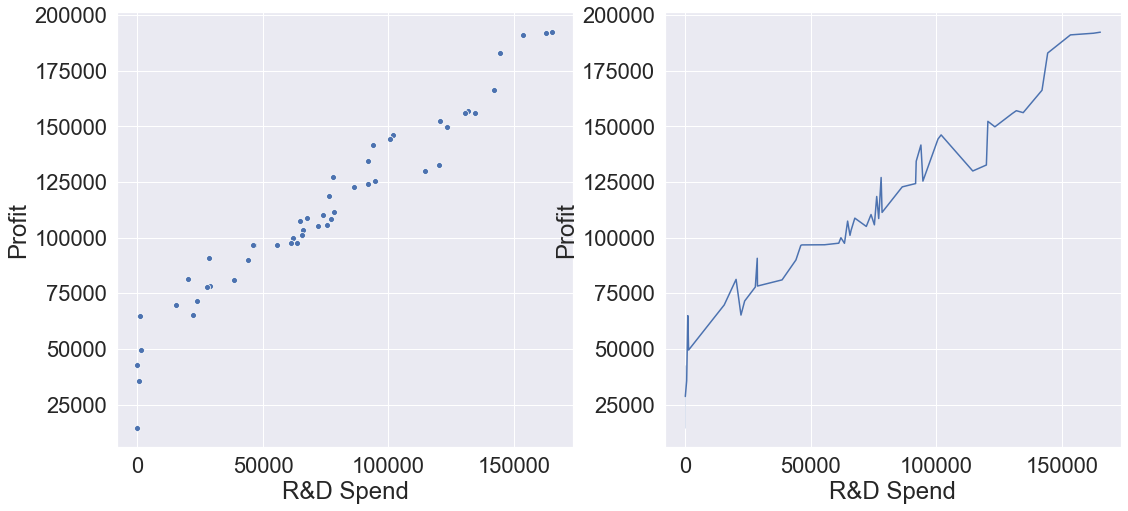

In [23]:
# R&D vs Profit
sns.set(font_scale=2)
f, axes = plt.subplots(1,2, figsize = (18,8))
sns.scatterplot(df['R&D Spend'], df['Profit'], ax = axes[0])
sns.lineplot(df['R&D Spend'], df['Profit'], ax = axes[1])
plt.show()

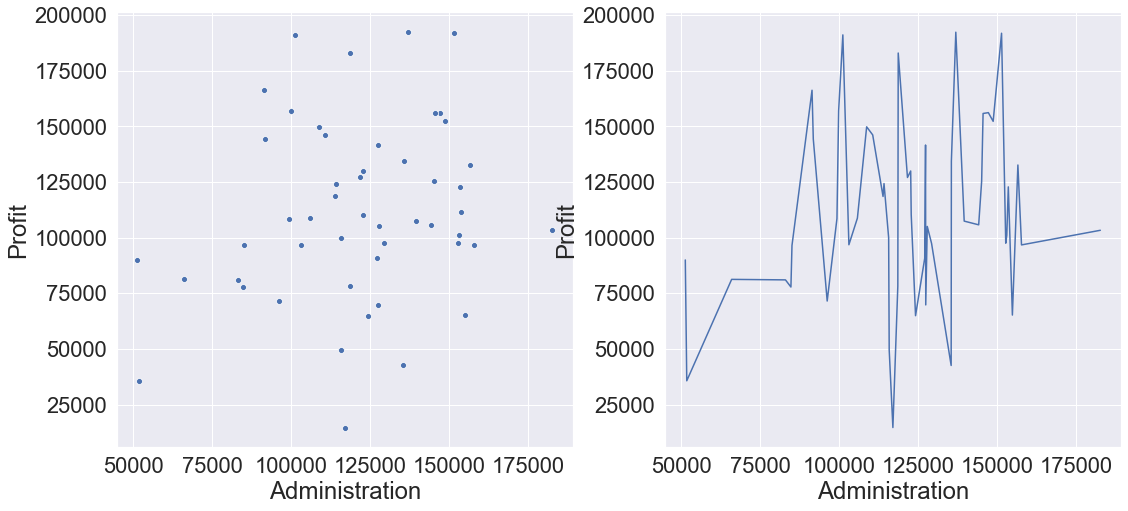

In [25]:
# Administration vs Profit: 
sns.set(font_scale=2)
f, axes = plt.subplots(1,2,figsize = (18,8))
sns.scatterplot(df['Administration'], df['Profit'], ax = axes[0])
sns.lineplot(df['Administration'], df['Profit'], ax = axes[1])
plt.show()

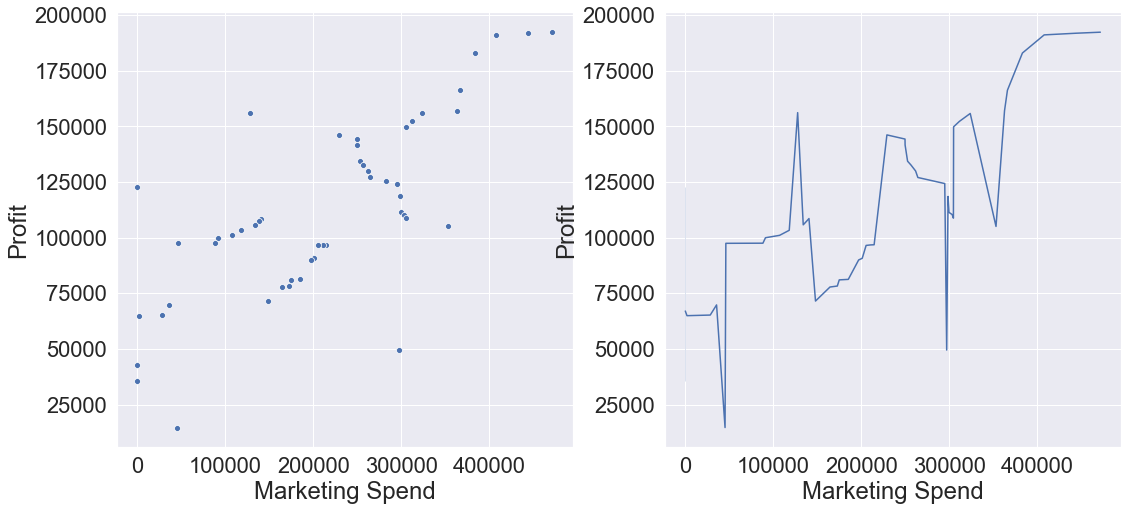

In [26]:
# Marketing vs Profit: 
sns.set(font_scale=2)
f, axes = plt.subplots(1,2,figsize = (18,8))
sns.scatterplot(df['Marketing Spend'], df['Profit'], ax = axes[0])
sns.lineplot(df['Marketing Spend'], df['Profit'], ax = axes[1])
plt.show()

In [38]:
# Getting rid of the dummy variable trap: 
df = pd.get_dummies(df)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [68]:
# Getting rid of the dummy variable trap:
df = df.drop(columns=['State_New York'])

In [69]:
# Dataframe now: 
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [70]:
# Splitting the dataset into x and y: 
x = df.copy()
x = x.drop(columns = ['Profit'])
y = df.Profit.values

In [71]:
x.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [72]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [73]:
# Splitting the dataset into x and y: 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [74]:
# Preprocessing the dataset: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_temp = pd.DataFrame(sc.fit_transform(x_train))
x_train_temp.index = x_train.index
x_train_temp.columns = x_train.columns
x_train = x_train_temp.copy()

x_test_temp = pd.DataFrame(sc.transform(x_test))
x_test_temp.index = x_test.index
x_test_temp.columns = x_test.columns
x_test = x_test_temp.copy()

In [75]:
# x_train and x_test after preprocessing: 
x_train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
12,0.342021,0.227877,0.124250,-0.693889,1.362770
4,1.362078,-1.097474,1.149907,-0.693889,1.362770
37,-0.710813,-2.577019,-0.341368,1.441153,-0.733799
8,0.906114,1.017237,0.668902,-0.693889,-0.733799
3,1.409971,-0.091154,1.300069,-0.693889,-0.733799


In [76]:
x_test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida
13,0.302454,0.529428,0.149162,1.441153,-0.733799
39,-0.827346,-1.407694,-0.535605,1.441153,-0.733799
30,-0.331819,-0.202947,-1.275058,-0.693889,1.362770
45,-1.621474,0.111039,-2.061763,-0.693889,-0.733799
17,0.358797,0.882912,0.412869,-0.693889,-0.733799


In [77]:
# Building the Regressor: 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
# Using regressor to make prediction: 
y_pred = regressor.predict(x_test)

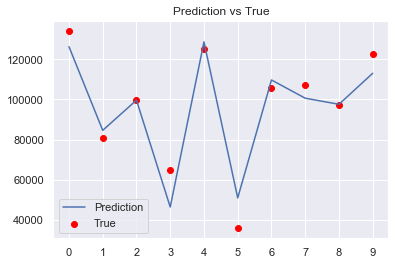

In [79]:
# Comparing y_pred and y_test: 
sns.set(font_scale=1)
plt.scatter(range(0,10),y_test, color = 'red', label = 'True')
plt.plot(range(0,10),y_pred, label = 'Prediction')
plt.legend()
plt.xticks(range(0,10))
plt.title('Prediction vs True')
plt.show()

### Implementing the Backward propagation: 

In [93]:
# Creating a duplicate dataframe. 
x_temp = df.copy()
# Adding an extra col of ones.
x_temp['ones'] = np.ones([df.shape[0],1]).astype(int)

In [95]:
# Verifying the modified dataframe: 
x_temp.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,ones
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,1
2,153441.51,101145.55,407934.54,191050.39,0,1,1
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,1


In [96]:
import statsmodels.api as sm
x_temp = x_temp.drop(columns = ['Profit'])
x_opt = x_temp.iloc[:,:]
ols = sm.OLS(endog=df['Profit'], exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.34e-27
Time:                        17:39:42   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California    41.8870   3256.039      0.013      0.990   -6520.229    6604.003
State_Florida      240.6758   3338.857      0.072      0.943   -6488.349    6969.701
ones              5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Removing State_Florida, due to high p-value
x_temp = x_temp.drop(columns=['State_Florida'])
x_opt = x_temp.iloc[:,:]
ols = sm.OLS(endog=df['Profit'], exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           8.51e-29
Time:                        17:40:01   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8057      0.046     17.646      0.000       0.714       0.898
Administration      -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing Spend      0.0272      0.017      1.627      0.111      -0.006       0.061
State_California   -70.2265   2828.752     -0.025      0.980   -5767.625    5627.172
ones              5.016e+04   6798.992      7.377      0.000    3.65e+04    6.39e+04
==============================================================================
Omnibus:                       14.785   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.242
Skew:                          -0.949   Prob(JB):                     2.44e-05
Kurtosis:                       5.568   Cond. No.                     1.44e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
# Removing State_California, due to high p-value
x_temp = x_temp.drop(columns=['State_California'])
x_opt = x_temp.iloc[:,:]
ols = sm.OLS(endog=df['Profit'], exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           4.53e-30
Time:                        17:40:15   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
ones             5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
# Removing Administration due to high p values: 
x_temp = x_temp.drop(columns=['Administration'])
x_opt = x_temp.iloc[:,:]
ols = sm.OLS(endog=df['Profit'], exog=x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.16e-31
Time:                        17:41:05   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
ones             4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
# Final selected columns: 
x_temp.columns

Index(['R&D Spend', 'Marketing Spend', 'ones'], dtype='object')